In [5]:
import numpy as np
import pandas as pd

Iteration 0, Loss: 0.6942
Iteration 100, Loss: 0.4059
Iteration 200, Loss: 0.3021
Iteration 300, Loss: 0.2450
Iteration 400, Loss: 0.2093
Iteration 500, Loss: 0.1849
Iteration 600, Loss: 0.1672
Iteration 700, Loss: 0.1537
Iteration 800, Loss: 0.1431
Iteration 900, Loss: 0.1345

Точность на тестовой выборке: 0.9950

Объединенный вектор параметров (theta): [-5.87076234  0.95230507  0.78391731]
Смещение (bias): -5.8708
Веса: [0.95230507 0.78391731]


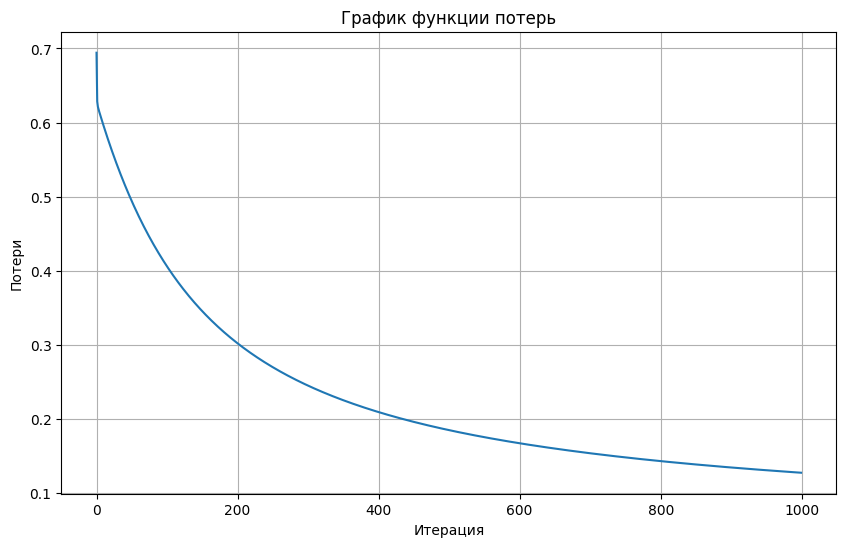

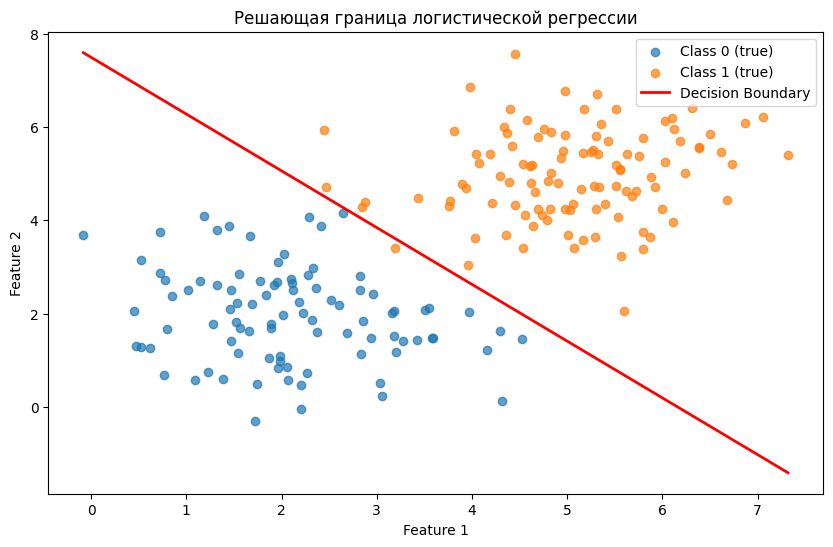

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, verbose=False):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.verbose = verbose
        self.theta = None  # Объединенный вектор параметров [bias, weights]
        self.loss_history = []
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))
    
    def _initialize_parameters(self, n_features):
        self.theta = np.random.normal(0, 0.01, n_features + 1)
        
    def _compute_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X, y):
        X_b = self._add_intercept(X)
        n_samples, n_features = X_b.shape
        
        self._initialize_parameters(X.shape[1])
        
        for iteration in range(self.n_iterations):
            
            linear_model = np.dot(X_b, self.theta)
            y_pred = self._sigmoid(linear_model)
            
            gradient = (1 / n_samples) * np.dot(X_b.T, (y_pred - y))
            
            self.theta -= self.learning_rate * gradient
            
            loss = self._compute_loss(y, y_pred)
            self.loss_history.append(loss)
            
            if self.verbose and iteration % 100 == 0:
                print(f"Iteration {iteration}, Loss: {loss:.4f}")
    
    def predict_proba(self, X):
        X_b = self._add_intercept(X)
        linear_model = np.dot(X_b, self.theta)
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def plot_loss_history(self):
        """Визуализация истории потерь"""
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.loss_history)), self.loss_history)
        plt.title('График функции потерь')
        plt.xlabel('Итерация')
        plt.ylabel('Потери')
        plt.grid(True)
        plt.show()
    
    def get_params(self):
        return {
            'theta': self.theta,
            'bias': self.theta[0],
            'weights': self.theta[1:],
            'learning_rate': self.learning_rate,
            'n_iterations': self.n_iterations
        }
    
    def get_decision_boundary(self, X, threshold=0.5):
        if X.shape[1] != 2:
            raise ValueError("Метод работает только для 2 признаков")
        
        boundary_constant = np.log(threshold / (1 - threshold))
        
        def boundary_function(x1):
            return (-self.theta[0] - self.theta[1] * x1 + boundary_constant) / self.theta[2]
        
        return boundary_function

# Пример использования
if __name__ == "__main__":
    # Создание синтетических данных
    np.random.seed(42)
    
    # Генерация данных для бинарной классификации
    n_samples = 1000
    n_features = 2
    
    # Класс 0
    X_class0 = np.random.normal(2, 1, (n_samples // 2, n_features))
    y_class0 = np.zeros(n_samples // 2)
    
    # Класс 1
    X_class1 = np.random.normal(5, 1, (n_samples // 2, n_features))
    y_class1 = np.ones(n_samples // 2)
    
    # Объединение данных
    X = np.vstack((X_class0, X_class1))
    y = np.hstack((y_class0, y_class1))
    
    # Перемешивание данных
    indices = np.random.permutation(n_samples)
    X = X[indices]
    y = y[indices]
    
    # Разделение на обучающую и тестовую выборки
    split_idx = int(0.8 * n_samples)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    
    # Создание и обучение модели
    model = LogisticRegression(learning_rate=0.1, n_iterations=1000, verbose=True)
    model.fit(X_train, y_train)
    
    # Предсказания
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    
    print(f"\nТочность на тестовой выборке: {accuracy:.4f}")
    
    # Получение параметров модели
    params = model.get_params()
    print(f"\nОбъединенный вектор параметров (theta): {params['theta']}")
    print(f"Смещение (bias): {params['bias']:.4f}")
    print(f"Веса: {params['weights']}")
    
    # Визуализация потерь
    model.plot_loss_history()
    
    # Демонстрация работы с решающей границей для 2D данных
    if X.shape[1] == 2:
        boundary_func = model.get_decision_boundary(X_test)
        x1_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
        x2_boundary = boundary_func(x1_range)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
                   alpha=0.7, label='Class 0 (true)')
        plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
                   alpha=0.7, label='Class 1 (true)')
        plt.plot(x1_range, x2_boundary, 'r-', linewidth=2, label='Decision Boundary')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.title('Решающая граница логистической регрессии')
        plt.show()